<img src="pic.png"> <br>
<b>Notebook by Ritwik Raj and Ritesh Kumar </b>

#### The ever-present challenge for consumer finance companies lies in balancing the need to grow their business with the risk of loan defaults.  

Our company, a leading online loan provider, is no exception. While we strive to offer accessible loan options to urban customers, we must also make informed decisions to minimize credit losses.

<b>Our Objective ?</b> <br>

It is to leverage historical loan data to identify patterns that predict loan default risk . By developing an understanding of the key factors that influence default , we can significantly improve our risk assessment strategies . 

The path forward includes analysing applicants and loan attributes , aiming to uncover hidden trends that differentiate between responsible borrowers and those likely to default.  Equipped with these insights, we can make data-driven decisions regarding loan approvals, terms, and portfolio management.  

<b>Desired Outcomes :</b>
* Reduce credit loss by denying loans to high-risk applicants
* Adjusting loan terms (amount, interest rate) based on risk 

<b>Ultimately, our goal is to achieve sustainable growth while minimizing the financial impact of defaults – a win-win scenario for both our company and our valued customers. 

In [1]:
# Importing all the libraries required 
import numpy as np 
import pandas as pd 
pd.set_option("display.max_columns", None)
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings 
warnings.filterwarnings("ignore")

# Reading the dataset 
loan_data = pd.read_csv("loan.csv")
display(loan_data.head())
# Data info and description 
print(f"Shape of the dataset : {loan_data.shape}")
print()
display(loan_data.info())
display(loan_data.describe())

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

Shape of the dataset : (39717, 111)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


None

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

<b>Our target variable is the 'loan_status' field . Checking its distribution using a countplot . </b>

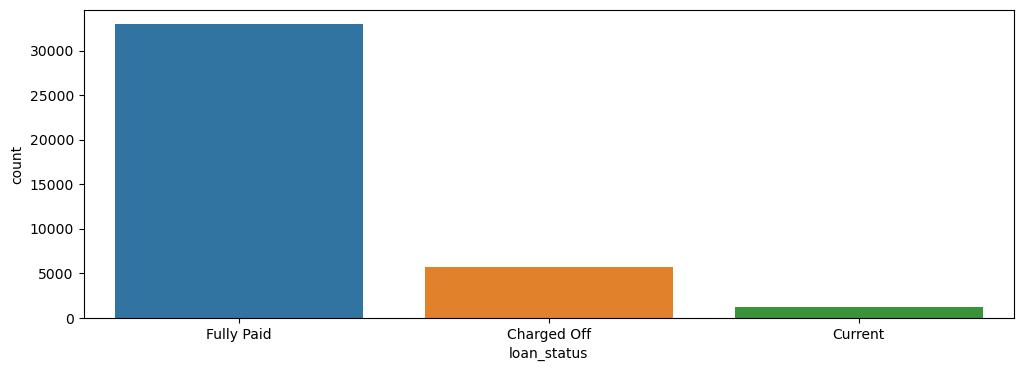

In [2]:
plt.figure(figsize=[12, 4])
sns.countplot(data=loan_data, x='loan_status', hue='loan_status'); 

#### Inference : 
* A significant majority of the customers have successfully paid back their loans . 

* Loan Performance : The data suggests that most loans are repaid , however , the presence of charged-off loans highlights the need for risk management and potenitally improving credit evaluation processes to minimize defaults .

<b>Also checking the distribution of loan_amount </b>

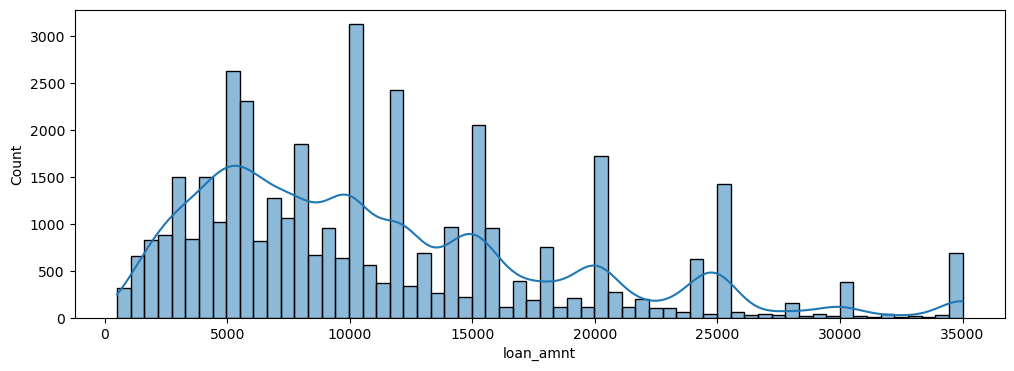

In [3]:
plt.figure(figsize=[12,4])
sns.histplot(data=loan_data, x='loan_amnt', kde=True); 

#### Inference : 
* Most loans are below $20,000 and prominent peaks around $5,000 , $10,000 and $15,000 , indicating these are common amounts requested by the borrowers .

* There are fewer loans above $25,000 , suggesting that higher amount loans are less common , which can be further solidified by the smoother KDE curve as the amount increases .

<b> Cleaning the dataset before further analysis </b>

In [4]:
# Checking for null values 

loan_data.isnull().any().sum()

68

Out of a possible 111 columns , 68 have null / missing values . 

Dropping rows with missing values and checking its impace on the size of the dataset . 

In [5]:
print(loan_data.shape) 

loan_data.dropna(axis=0, inplace=True)

print(loan_data.shape)

(39717, 111)
(0, 111)


As can be seen , almost all rows have atleast 1 missing values . 

In [6]:
# Re-reading the dataset 
loan_data = pd.read_csv('loan.csv')

In [7]:
# loan_data['application_type']
# loan_data['mort_acc']
# loan_data['addr_state']

temp = loan_data[['application_type','mort_acc','addr_state']] ### DELETE LATER 

Dropping columns 

In [8]:
print(loan_data.columns)
print()
print(f"Shape of the dataset : {loan_data.shape}")
print()
loan_data.dropna(axis=1,how='all',inplace=True)
print(loan_data.columns)
print()
print(f"Shape of the dataset : {loan_data.shape}")

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

Shape of the dataset : (39717, 111)

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initia

We are left with 57 columns , out of a possible 111 colummns . As can be seen , the target columns (loan_amnt, loan_status) are still present . 

In the interest of time , we will be proceeding with the new processed dataset . 

In [9]:
loan_data.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.0,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.0,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [15]:
loan_data = pd.concat([loan_data, temp], axis=1) ### DELETE LATER 

In [16]:
print(f"Are there any more missing values : {loan_data.isna().any().any()}")

Are there any more missing values : True


Unique values in each column

In [17]:
loan_data.nunique().sort_values(ascending=True)

mort_acc                          0
initial_list_status               1
application_type                  1
tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
collections_12_mths_ex_med        1
pymnt_plan                        1
policy_code                       1
term                              2
next_pymnt_d                      2
pub_rec_bankruptcies              3
verification_status               3
loan_status                       3
pub_rec                           5
home_ownership                    5
grade                             7
inq_last_6mths                    9
delinq_2yrs                      11
emp_length                       11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
addr_state                       50
issue_d                     

#### Inference : 

Eliminating Single-Valued Columns : Single-valued columns, which contain only one unique value, provide no variation and therefore no useful information for analysis. 

Removing these columns helps simplify your dataset and focus on features that contribute meaningful information.


In [757]:
loan_data.drop(columns = loan_data.nunique()[loan_data.nunique() == 1].index.to_list() , axis=1 , inplace=True)

In [758]:
print(f"Current size of the dataset : {loan_data.shape}")
loan_data.head(3)

Current size of the dataset : (39717, 48)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.0,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.0,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0


##### Splitting the dataset into categorical and numerical features 

This will help us judge which columns to drop , for example , it is normal for the numerical column to have 20,000 unique data points in a table with 35,000 rows , but not for object datatype , as it will contribute very little to our analysis , with the scope of this project in mind . 

In [759]:
print("Displaying object dtypes ")
display(loan_data.select_dtypes(include='object').head(3))
print(loan_data.select_dtypes(include='object').nunique().sort_values(ascending=False))

Displaying object dtypes 


,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,url,desc,purpose,title,zip_code,addr_state,earliest_cr_line,revol_util,last_pymnt_d,next_pymnt_d,last_credit_pull_d
0,36 months,10.65%,B,B2,NaN,10+ years,RENT,Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,Jan-85,83.70%,Jan-15,NaN,May-16
1,60 months,15.27%,C,C4,Ryder,< 1 year,RENT,Source Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,Apr-99,9.40%,Apr-13,NaN,Sep-13
2,36 months,15.96%,C,C5,NaN,10+ years,RENT,Not Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,Nov-01,98.50%,Jun-14,NaN,May-16


url                    39717
emp_title              28820
desc                   26526
title                  19615
revol_util              1089
zip_code                 823
earliest_cr_line         526
int_rate                 371
last_credit_pull_d       106
last_pymnt_d             101
issue_d                   55
addr_state                50
sub_grade                 35
purpose                   14
emp_length                11
grade                      7
home_ownership             5
loan_status                3
verification_status        3
next_pymnt_d               2
term                       2
dtype: int64


In [760]:
print("Displaying numeric dtypes ")
display(loan_data.select_dtypes(exclude='object').head())
print(loan_data.select_dtypes(exclude='object').nunique().sort_values(ascending=False))


Displaying numeric dtypes 


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,162.87,24000.0,27.65,0,1,NaN,NaN,3,0,13648,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,171.62,0.0
1,1077430,1314167,2500,2500,2500.0,59.83,30000.0,1.00,0,5,NaN,NaN,3,0,1687,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,0.0
2,1077175,1313524,2400,2400,2400.0,84.33,12252.0,8.72,0,2,NaN,NaN,2,0,2956,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,649.91,0.0
3,1076863,1277178,10000,10000,10000.0,339.31,49200.0,20.00,0,1,35.0,NaN,10,0,5598,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,357.48,0.0
4,1075358,1311748,3000,3000,3000.0,67.79,80000.0,17.94,0,0,38.0,NaN,15,0,27783,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,67.79,0.0


id                         39717
member_id                  39717
total_pymnt                37850
total_pymnt_inv            37518
total_rec_int              35148
last_pymnt_amnt            34930
revol_bal                  21711
installment                15383
funded_amnt_inv             8205
total_rec_prncp             7976
annual_inc                  5318
recoveries                  4040
dti                         2868
collection_recovery_fee     2616
total_rec_late_fee          1356
out_prncp_inv               1138
out_prncp                   1137
funded_amnt                 1041
loan_amnt                    885
mths_since_last_record       111
mths_since_last_delinq        95
total_acc                     82
open_acc                      40
delinq_2yrs                   11
inq_last_6mths                 9
pub_rec                        5
pub_rec_bankruptcies           3
dtype: int64


Checking for number of unique values across the dataset to eliminate column(s) that has <b> unique </b> value close to the length of the dataset , since they wont be serving a purpose in the analysis .

In [761]:
loan_data[['funded_amnt','funded_amnt_inv']].head()

,funded_amnt,funded_amnt_inv
0,5000,4975.0
1,2500,2500.0
2,2400,2400.0
3,10000,10000.0
4,3000,3000.0


In [762]:
display(loan_data[["id","member_id","url","title","emp_title","zip_code"]].head(3))
print(loan_data[["id","member_id","url","title","emp_title","zip_code"]].nunique())

,id,member_id,url,title,emp_title,zip_code
0,1077501,1296599,https://lendingclub.com/browse/loanDetail.acti...,Computer,NaN,860xx
1,1077430,1314167,https://lendingclub.com/browse/loanDetail.acti...,bike,Ryder,309xx
2,1077175,1313524,https://lendingclub.com/browse/loanDetail.acti...,real estate business,NaN,606xx


id           39717
member_id    39717
url          39717
title        19615
emp_title    28820
zip_code       823
dtype: int64


#### Inference 

* Columns like "id" , "member_id" etc. carry very little to no significance in our analysis since their uniqueness does not contribute to our goal of generalising trends . ("id","member_id","url","title","emp_title","zip_code")

* 'desc' contains the loan description given by the borrower . Insights can be drawn out of this but that will be out of the scope of this project . 

* "funded_amnt" is not needed as it is replicating the "funded_amnt_inv" column . 

* "out_prncp_inv" , "total_pymnt_inv" are useful for investors but not contributing to the loan defaulting analysis , so removing them

* <b>All the rest of the columns are either too unique or repetitive in nature , after careful consideration , the list of columns to be axed are written below .</b>

In [763]:
loan_data.drop(columns=["id", "member_id", "url", "title", "emp_title", "zip_code", "last_credit_pull_d", "addr_state","desc","out_prncp_inv","total_pymnt_inv","funded_amnt", "delinq_2yrs", "revol_bal", "out_prncp", "total_pymnt", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt", "next_pymnt_d"], inplace=True)

In [764]:
print(f"Current shape of the data : {loan_data.shape}")
display(loan_data.head())
print(loan_data.columns)

Current shape of the data : (39717, 24)


,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_util,total_acc,pub_rec_bankruptcies
0,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,27.65,Jan-85,1,NaN,NaN,3,0,83.70%,9,0.0
1,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,1.00,Apr-99,5,NaN,NaN,3,0,9.40%,4,0.0
2,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,8.72,Nov-01,2,NaN,NaN,2,0,98.50%,10,0.0
3,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,20.00,Feb-96,1,35.0,NaN,10,0,21%,37,0.0
4,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,17.94,Jan-96,0,38.0,NaN,15,0,53.90%,38,0.0


Index(['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'dti',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_util',
       'total_acc', 'pub_rec_bankruptcies'],
      dtype='object')


In [765]:
display(loan_data[['inq_last_6mths', 'mths_since_last_delinq','mths_since_last_record','pub_rec_bankruptcies']])
print(loan_data[['inq_last_6mths', 'mths_since_last_delinq','mths_since_last_record','pub_rec_bankruptcies']].nunique())
print(loan_data[['inq_last_6mths', 'mths_since_last_delinq','mths_since_last_record','pub_rec_bankruptcies']].isna().sum())

,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,pub_rec_bankruptcies
0,1,NaN,NaN,0.0
1,5,NaN,NaN,0.0
2,2,NaN,NaN,0.0
3,1,35.0,NaN,0.0
4,0,38.0,NaN,0.0
...,...,...,...,...
39712,0,0.0,0.0,NaN
39713,1,5.0,0.0,NaN
39714,0,0.0,0.0,NaN
39715,0,0.0,0.0,NaN


inq_last_6mths              9
mths_since_last_delinq     95
mths_since_last_record    111
pub_rec_bankruptcies        3
dtype: int64
inq_last_6mths                0
mths_since_last_delinq    25682
mths_since_last_record    36931
pub_rec_bankruptcies        697
dtype: int64


#### Inference : 
* "mths_since_last_delinq" and "mths_since_last_record" , both these records show a high number of missing data , therefore dropping these columns . 

In [766]:
loan_data.drop(columns=["mths_since_last_delinq","mths_since_last_record"], axis=1, inplace=True)

In [767]:
print(f"Current shape of the data : {loan_data.shape}")
loan_data.head(3)

Current shape of the data : (39717, 22)


,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,pub_rec_bankruptcies
0,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,27.65,Jan-85,1,3,0,83.70%,9,0.0
1,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,1.00,Apr-99,5,3,0,9.40%,4,0.0
2,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,8.72,Nov-01,2,2,0,98.50%,10,0.0


In [768]:
loan_data.isna().sum() # investigating emp_length

loan_amnt                  0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length              1075
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
dti                        0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_util                50
total_acc                  0
pub_rec_bankruptcies     697
dtype: int64

In [769]:
loan_data['emp_length'].value_counts()

emp_length
10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: count, dtype: int64

In [770]:
display(loan_data[['revol_util','pub_rec_bankruptcies']].head(3))
print(loan_data['revol_util'].value_counts())
print(loan_data['pub_rec_bankruptcies'].value_counts())

,revol_util,pub_rec_bankruptcies
0,83.70%,0.0
1,9.40%,0.0
2,98.50%,0.0


revol_util
0%        977
0.20%      63
63%        62
40.70%     58
66.70%     58
         ... 
25.74%      1
47.36%      1
24.65%      1
10.61%      1
7.28%       1
Name: count, Length: 1089, dtype: int64
pub_rec_bankruptcies
0.0    37339
1.0     1674
2.0        7
Name: count, dtype: int64


##### Inference
* We can either drop the missing rows from "emp_length" or fill in with the mode of "emp_length" 

* Since the rows being dropped constitute ~ 3% of the entire dataset , we can afford to drop the missing rows.

* Same can be done with "revol_util" and "pub_rec_bankruptcies" . 

In [771]:
loan_data.dropna(axis=0, subset=['emp_length','revol_util','pub_rec_bankruptcies'], inplace=True)

In [772]:
loan_data.isna().sum()

loan_amnt               0
funded_amnt_inv         0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
inq_last_6mths          0
open_acc                0
pub_rec                 0
revol_util              0
total_acc               0
pub_rec_bankruptcies    0
dtype: int64

#### The cleaned dataset devoid of any missing (NA) values 

In [773]:
display(loan_data.head(3))
print(loan_data.info())

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,pub_rec_bankruptcies
0,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,27.65,Jan-85,1,3,0,83.70%,9,0.0
1,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,1.00,Apr-99,5,3,0,9.40%,4,0.0
2,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,8.72,Nov-01,2,2,0,98.50%,10,0.0


<class 'pandas.core.frame.DataFrame'>
Index: 37898 entries, 0 to 39680
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             37898 non-null  int64  
 1   funded_amnt_inv       37898 non-null  float64
 2   term                  37898 non-null  object 
 3   int_rate              37898 non-null  object 
 4   installment           37898 non-null  float64
 5   grade                 37898 non-null  object 
 6   sub_grade             37898 non-null  object 
 7   emp_length            37898 non-null  object 
 8   home_ownership        37898 non-null  object 
 9   annual_inc            37898 non-null  float64
 10  verification_status   37898 non-null  object 
 11  issue_d               37898 non-null  object 
 12  loan_status           37898 non-null  object 
 13  purpose               37898 non-null  object 
 14  dti                   37898 non-null  float64
 15  earliest_cr_line      37

Rechecking the distribution of the target variables 

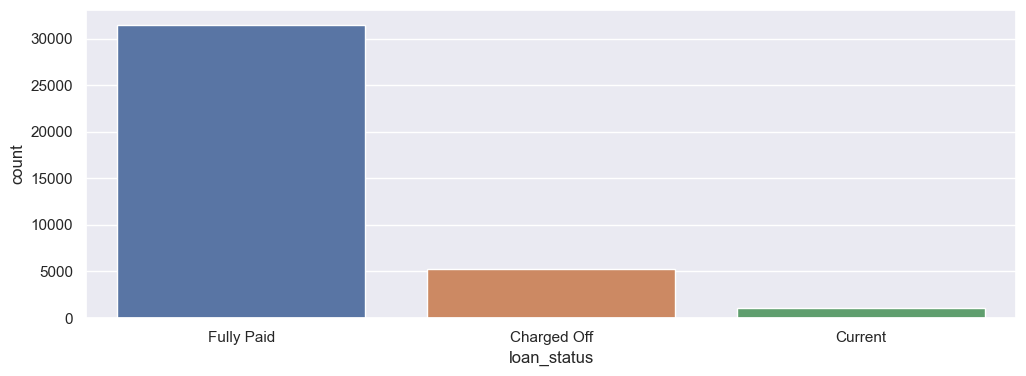

In [774]:
plt.figure(figsize=[12, 4])
sns.countplot(data=loan_data, x='loan_status', hue='loan_status'); 

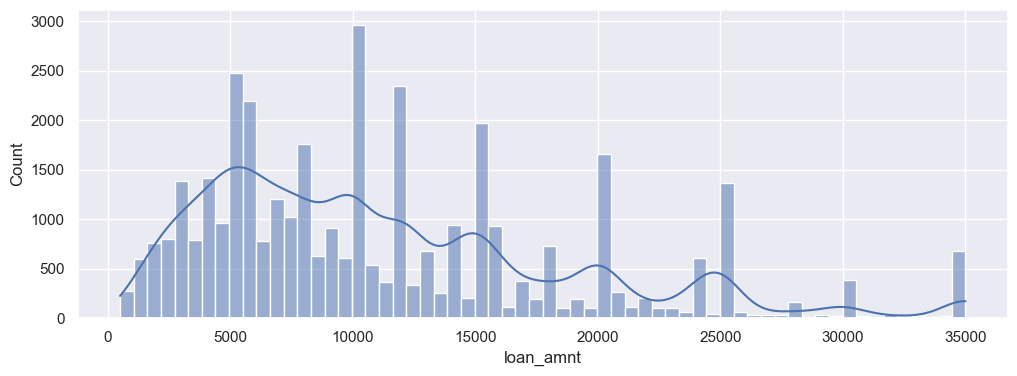

In [775]:
plt.figure(figsize=[12,4])
sns.histplot(data=loan_data, x='loan_amnt', kde=True); 

#### Standardising the data 

Cross-checking the datatypes of the features in the dataset with the values presented in the table .

In [776]:
display(loan_data.head(3))
print(loan_data.dtypes)

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,pub_rec_bankruptcies
0,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,27.65,Jan-85,1,3,0,83.70%,9,0.0
1,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,1.00,Apr-99,5,3,0,9.40%,4,0.0
2,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,8.72,Nov-01,2,2,0,98.50%,10,0.0


loan_amnt                 int64
funded_amnt_inv         float64
term                     object
int_rate                 object
installment             float64
grade                    object
sub_grade                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
dti                     float64
earliest_cr_line         object
inq_last_6mths            int64
open_acc                  int64
pub_rec                   int64
revol_util               object
total_acc                 int64
pub_rec_bankruptcies    float64
dtype: object


For better understanding , here are the feature descriptions of all the remaining columns .

* loan_amnt : The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

* funded_amnt : The total amount committed to that loan at that point in time.

* term : The number of payments on the loan. Values are in months and can be either 36 or 60.

* int_rate : Interest Rate on the loan

* installment : The monthly payment owed by the borrower if the loan originates.

* grade : LC assigned loan grade

* sub_grade : LC assigned loan subgrade

* emp_length : Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 

* home_ownership : The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.

* annual_inc : The self-reported annual income provided by the borrower during registration.

* verification_status : Indicates if income was verified by LC, not verified, or if the income source was verified

* issue_d : The month which the loan was funded

* loan_status : The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

* purpose : A category provided by the borrower for the loan request. 

* dti : A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

* earliest_cr_line : The month the borrower's earliest reported credit line was opened

* inq_last_6mths : The number of inquiries in past 6 months (excluding auto and mortgage inquiries)

* open_acc : The number of open credit lines in the borrower's credit file.

* pub_rec : Number of derogatory public records

* revol_util : Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.

* total_acc : The total number of credit lines currently in the borrower's credit file

* pub_rec_bankruptcies : Number of public record bankruptcies



In [777]:
loan_data

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,pub_rec_bankruptcies
0,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,27.65,Jan-85,1,3,0,83.70%,9,0.0
1,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,1.00,Apr-99,5,3,0,9.40%,4,0.0
2,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,8.72,Nov-01,2,2,0,98.50%,10,0.0
3,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,20.00,Feb-96,1,10,0,21%,37,0.0
4,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,17.94,Jan-96,0,15,0,53.90%,38,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39562,4800,1100.0,36 months,10.28%,155.52,C,C1,1 year,RENT,35000.0,Not Verified,Nov-07,Fully Paid,debt_consolidation,7.51,Mar-00,0,11,1,68.70%,12,1.0
39573,7000,1000.0,36 months,10.59%,227.82,C,C2,3 years,MORTGAGE,63500.0,Not Verified,Nov-07,Fully Paid,debt_consolidation,8.50,Feb-89,1,9,1,79%,21,1.0
39623,9000,700.0,36 months,12.49%,301.04,D,D3,8 years,MORTGAGE,39000.0,Not Verified,Oct-07,Charged Off,debt_consolidation,5.08,Aug-97,3,9,1,62.90%,37,1.0
39666,15450,600.0,36 months,11.22%,507.46,C,C4,2 years,MORTGAGE,40000.0,Not Verified,Aug-07,Charged Off,debt_consolidation,13.50,Nov-92,3,13,1,34.30%,29,1.0


In [778]:
display(loan_data['revol_util'].head(3))
display(loan_data['int_rate'].head(3))
display(loan_data['term'].head(3))
display(loan_data['emp_length'].head(3))

0    83.70%
1     9.40%
2    98.50%
Name: revol_util, dtype: object

0    10.65%
1    15.27%
2    15.96%
Name: int_rate, dtype: object

0     36 months
1     60 months
2     36 months
Name: term, dtype: object

0    10+ years
1     < 1 year
2    10+ years
Name: emp_length, dtype: object

After evaluation : 

* 'revol_util' and 'int_rate' needs to be converted to numerical datatype 
* 'term' although an object , can be converted into a categorical values (0 and 1)
* 'emp_length' can be put on a scale of 0-10 . 

In [779]:
loan_data['revol_util'] = pd.to_numeric(loan_data['revol_util'].apply(lambda x : x.split('%')[0]))
loan_data['int_rate'] = pd.to_numeric(loan_data['int_rate'].apply(lambda x : x.split('%')[0]))

In [780]:
loan_data['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years'],
      dtype=object)

In [781]:
loan_data['emp_length_num'] = loan_data['emp_length'].apply(lambda x : 0 if "<" in x else (x.split("+")[0] if "+" in x else x.split()[0]))
loan_data['emp_length_num'] = loan_data['emp_length_num'].astype("int")

In [782]:
# Reading the data after all the transformations 

display(loan_data.head(3))
print(loan_data.info())

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,pub_rec_bankruptcies,emp_length_num
0,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,27.65,Jan-85,1,3,0,83.7,9,0.0,10
1,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,1.00,Apr-99,5,3,0,9.4,4,0.0,0
2,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,8.72,Nov-01,2,2,0,98.5,10,0.0,10


<class 'pandas.core.frame.DataFrame'>
Index: 37898 entries, 0 to 39680
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             37898 non-null  int64  
 1   funded_amnt_inv       37898 non-null  float64
 2   term                  37898 non-null  object 
 3   int_rate              37898 non-null  float64
 4   installment           37898 non-null  float64
 5   grade                 37898 non-null  object 
 6   sub_grade             37898 non-null  object 
 7   emp_length            37898 non-null  object 
 8   home_ownership        37898 non-null  object 
 9   annual_inc            37898 non-null  float64
 10  verification_status   37898 non-null  object 
 11  issue_d               37898 non-null  object 
 12  loan_status           37898 non-null  object 
 13  purpose               37898 non-null  object 
 14  dti                   37898 non-null  float64
 15  earliest_cr_line      37

### Performing Exploratory Data Analysis 

It is always a good idea , especially with classification problems to explore the actual balancing of the labels .

*** TESTING *** 
Removing the current loan_status column 

In [783]:
# loan_data['loan_status'].value_counts()
loan_data = loan_data[loan_data['loan_status'] != 'Current']

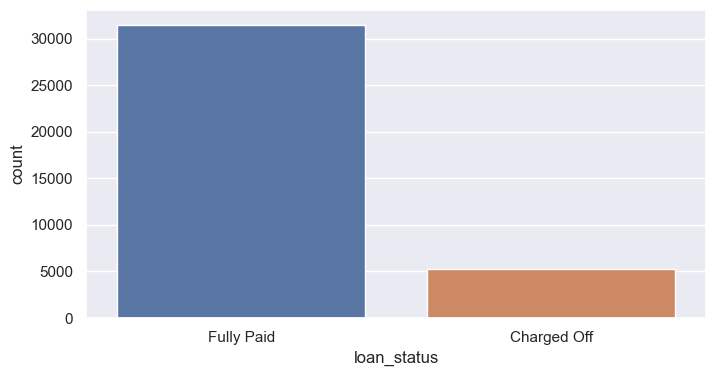

In [784]:
sns.countplot(data=loan_data, x='loan_status', hue='loan_status'); 

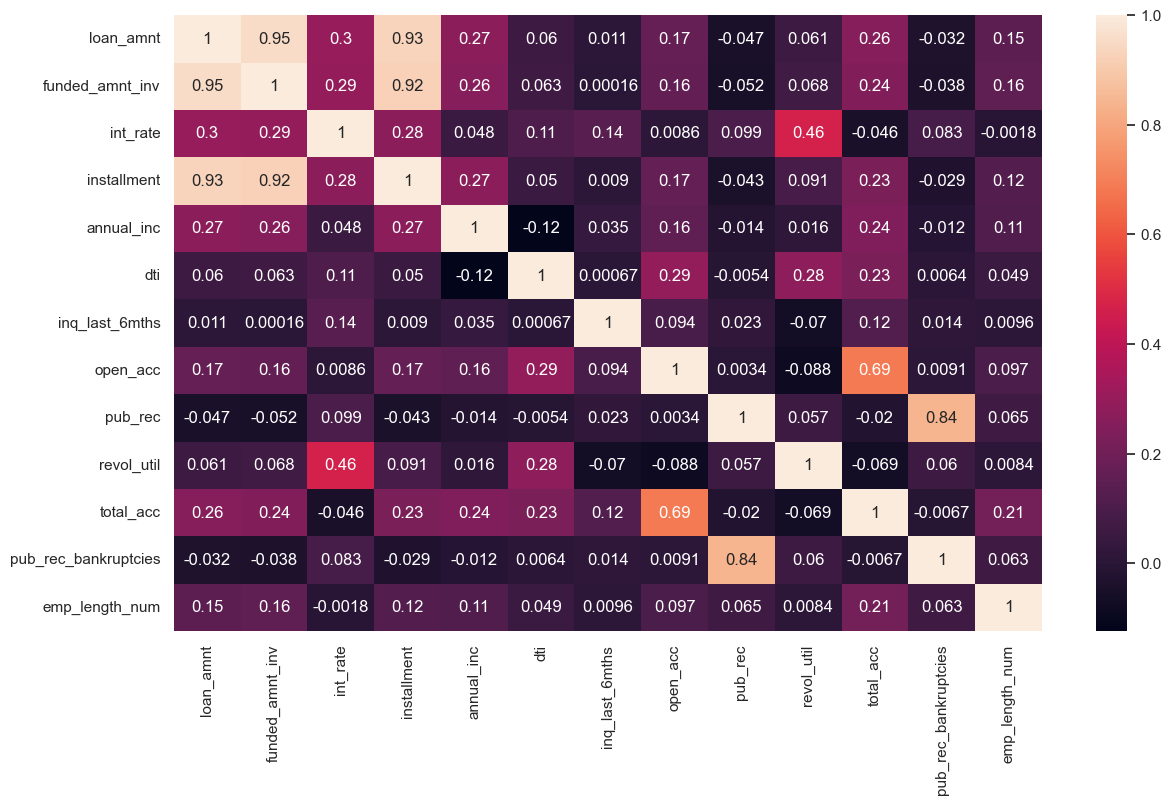

In [785]:
plt.figure(figsize=[14,8])
sns.heatmap(loan_data.corr(numeric_only=True), annot=True);

#### Inference 

* Strong Positive Correlations :

   - 'loan_amnt' and 'funded_amnt_inv' (0.95): This indicates that the amount loaned is highly correlated with the invested amount.

   - 'loan_amnt' and 'installment' (0.93): The loan amount is highly correlated with the installment amount.

   - 'installment' and 'funded_amnt_inv' (0.92): The installment amount is highly correlated with the invested amount.

   - 'pub_rec' and 'pub_rec_bankruptcies' (0.84): Public records are strongly correlated with public record bankruptcies.

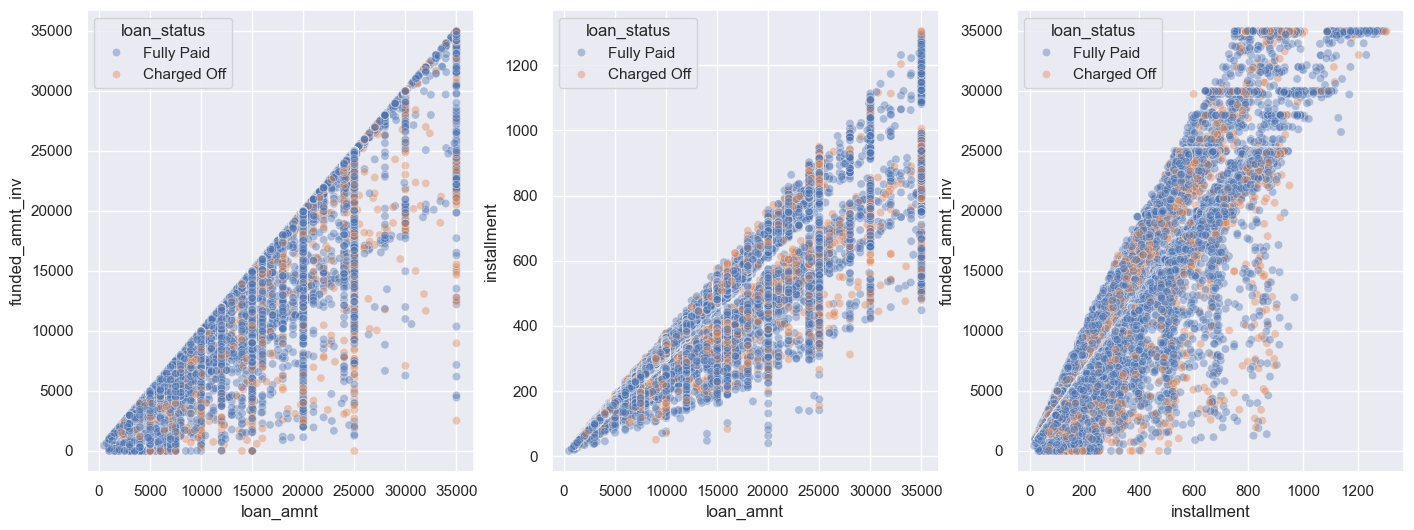

In [786]:
# Investigating 'loan_amnt' and 'funded_amnt_inv' 
plt.figure(figsize=[17,6])
plt.subplot(1,3,1)
sns.scatterplot(data=loan_data, x='loan_amnt', y='funded_amnt_inv', alpha=0.4, hue='loan_status'); 
plt.subplot(1,3,2)
sns.scatterplot(data=loan_data, x='loan_amnt', y='installment', alpha=0.4, hue='loan_status'); 
plt.subplot(1,3,3)
sns.scatterplot(data=loan_data, x='installment', y='funded_amnt_inv', alpha=0.4, hue='loan_status'); 

#### Inference : 
* funded_amnt_inv : The total amount committed by investors for that loan at that point in time. Therefore making it obvious for the installment vs loan amnt chart to show the same trend . 

* Generally , as the loan_amnt increases , so does the installment values . 

##### Checking the relationship between the two target variables : loan_amnt and loan_status 

In [787]:
data=loan_data[loan_data['loan_status'].isin(["Fully Paid","Charged Off"])]
data

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,pub_rec_bankruptcies,emp_length_num
0,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,27.65,Jan-85,1,3,0,83.7,9,0.0,10
1,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,1.00,Apr-99,5,3,0,9.4,4,0.0,0
2,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,8.72,Nov-01,2,2,0,98.5,10,0.0,10
3,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,20.00,Feb-96,1,10,0,21.0,37,0.0,10
5,5000,5000.0,36 months,7.90,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,11.20,Nov-04,3,9,0,28.3,12,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39562,4800,1100.0,36 months,10.28,155.52,C,C1,1 year,RENT,35000.0,Not Verified,Nov-07,Fully Paid,debt_consolidation,7.51,Mar-00,0,11,1,68.7,12,1.0,1
39573,7000,1000.0,36 months,10.59,227.82,C,C2,3 years,MORTGAGE,63500.0,Not Verified,Nov-07,Fully Paid,debt_consolidation,8.50,Feb-89,1,9,1,79.0,21,1.0,3
39623,9000,700.0,36 months,12.49,301.04,D,D3,8 years,MORTGAGE,39000.0,Not Verified,Oct-07,Charged Off,debt_consolidation,5.08,Aug-97,3,9,1,62.9,37,1.0,8
39666,15450,600.0,36 months,11.22,507.46,C,C4,2 years,MORTGAGE,40000.0,Not Verified,Aug-07,Charged Off,debt_consolidation,13.50,Nov-92,3,13,1,34.3,29,1.0,2


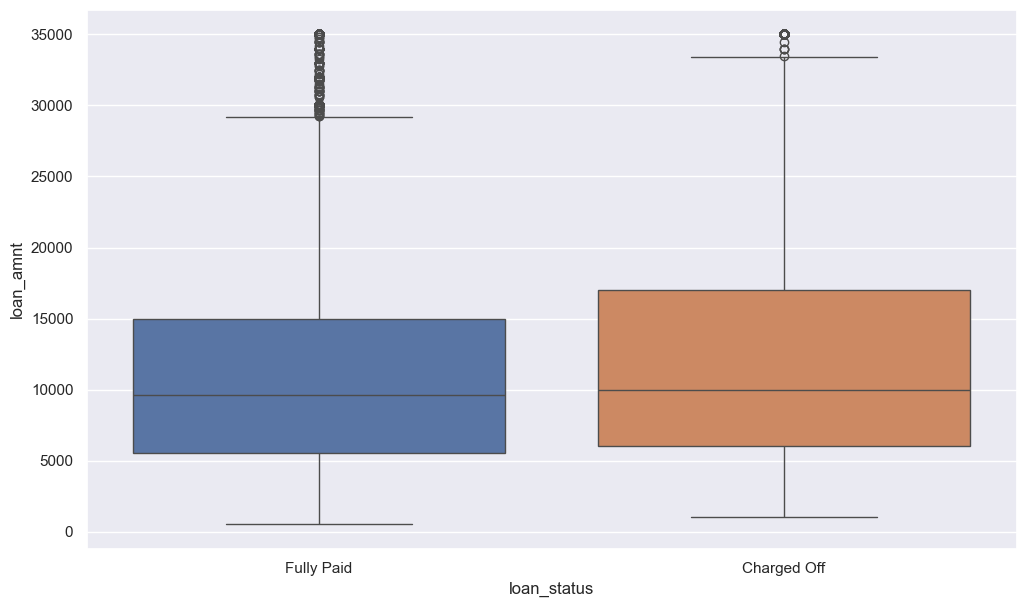

In [788]:
plt.figure(figsize=[12, 7])
# plt.subplot(1,2,1)
sns.boxplot(data=loan_data, y='loan_amnt', x='loan_status', hue='loan_status'); 
# plt.subplot(1,2,2)
# sns.boxplot(data=loan_data[loan_data['loan_status'].isin(["Fully Paid","Charged Off"])], y='loan_amnt', x='loan_status', hue='loan_status');

#### Inference 
* The box for "Fully Paid" loans shows a lower median and potentially a wider distribution compared to "Charged Off" loans. 

    This suggests that fully paid loans may encompass a wider range of loan amounts, with some borrowers having larger loans they were able to repay successfully.

* The "Charged Off" boxplot indicates a lower median loan amount compared to "Fully Paid" loans. 

    This could imply that smaller loans are more prone to default, possibly due to reasons like borrowers being less invested in smaller amounts or the lender having less stringent approval requirements for smaller loans.

Summary : Both the 'Fully Paid' and 'Charged Off' charts are extremely similar , and it is not going to be a good indicator of whether a person will be likely to default on their loan or not .e

##### Checking the relationship between 'loan_amnt' and 'grades' 

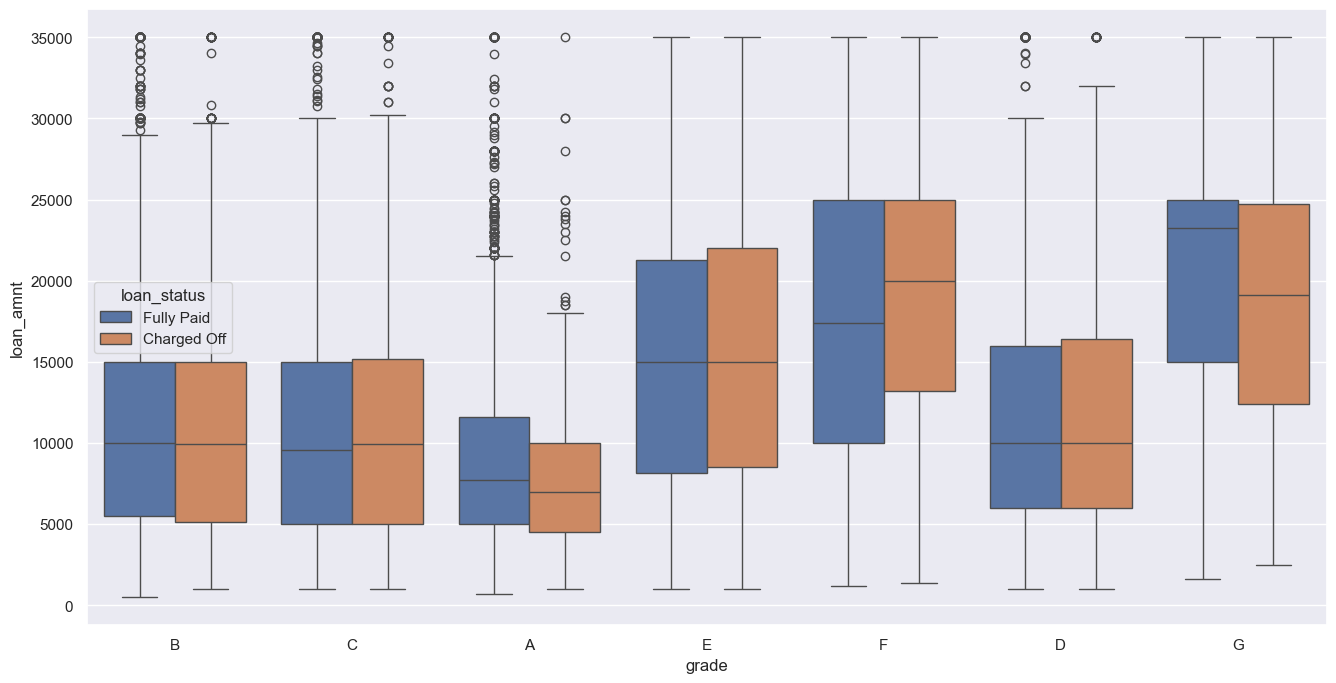

In [789]:
plt.figure(figsize=[16, 8])
sns.boxplot(data=loan_data, y='loan_amnt', x='grade', hue='loan_status');

#### Inference 

* The loan amount distribution appears to vary significantly across loan grades . 
* Higher loan amounts were given to grades E , F and G , while A , B , C and D have similar loan amount values .
* There are maximum number of outliers in Grade A . 

##### Mapping "Fully Paid" and "Charged Off" to 0 and 1. 

In [790]:
loan_data['loan_status_num'] = loan_data['loan_status'].apply(lambda x : 1 if x == 'Fully Paid' else 0)

##### Correlation of loan_status with other features 

In [791]:
loan_data.corr(numeric_only=True)['loan_status_num'].sort_values(ascending=False)[1:]

annual_inc              0.039467
total_acc               0.020265
open_acc                0.005672
emp_length_num         -0.015883
installment            -0.027129
dti                    -0.042687
funded_amnt_inv        -0.044005
pub_rec_bankruptcies   -0.045888
pub_rec                -0.050293
loan_amnt              -0.061353
inq_last_6mths         -0.069451
revol_util             -0.099876
int_rate               -0.214344
Name: loan_status_num, dtype: float64

<Axes: >

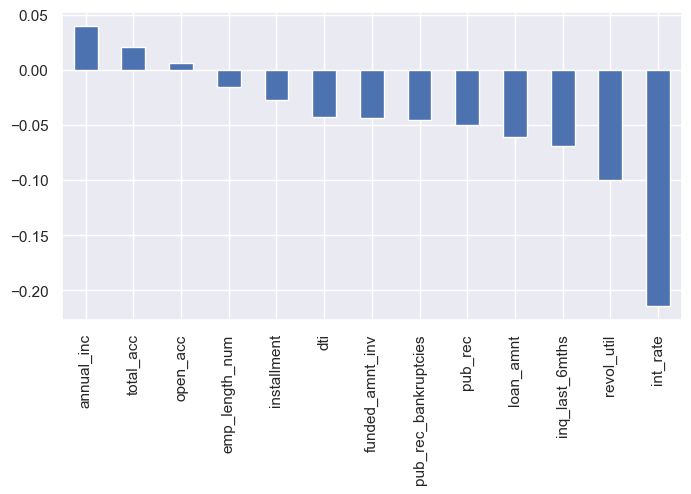

In [792]:
loan_data.corr(numeric_only=True)['loan_status_num'].sort_values(ascending=False)[1:].plot(kind='bar')

##### Inference 
Interest rates have the highest negative correlation , as higher the interest rate , the lower the ability to pay off the loan

##### Analysing employment length with loan status 

In [793]:
loan_data['emp_length'].value_counts()

emp_length
10+ years    8368
< 1 year     4329
2 years      4202
3 years      3947
4 years      3290
5 years      3157
1 year       3071
6 years      2133
7 years      1686
8 years      1408
9 years      1209
Name: count, dtype: int64

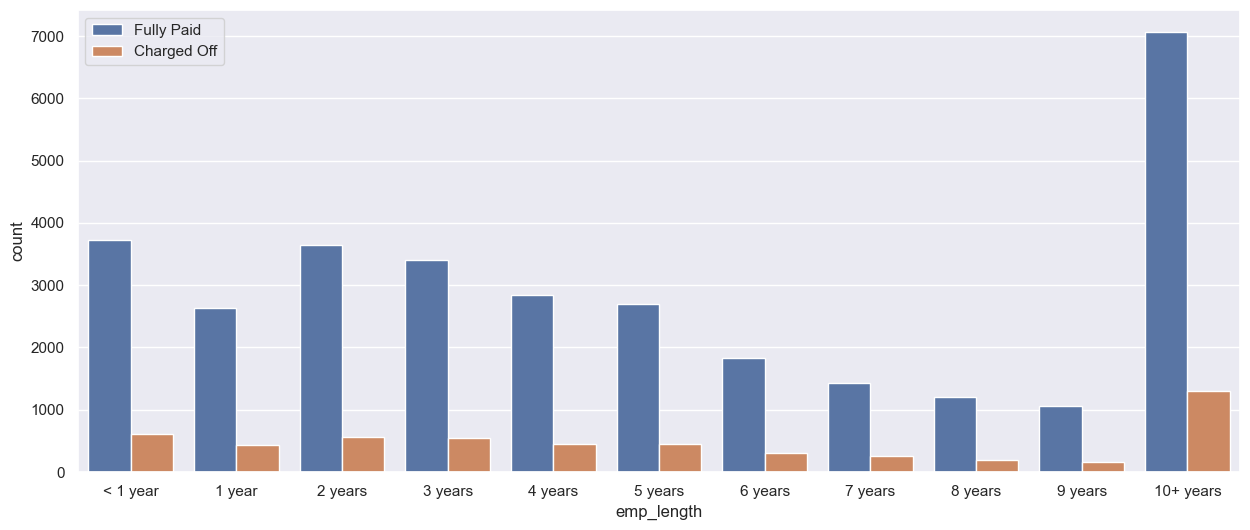

In [794]:
emp_length_order = [
 '< 1 year',
 '1 year',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '10+ years']

plt.figure(figsize=[15,6])
sns.countplot(data=loan_data, x='emp_length', order=emp_length_order, hue='loan_status'); 
plt.legend(); 

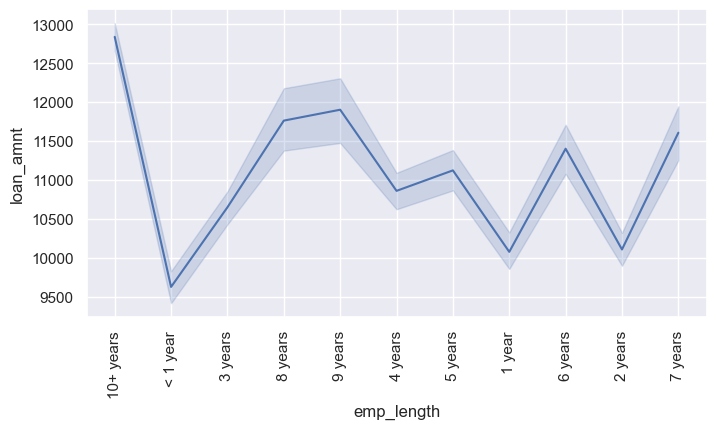

In [798]:
sns.lineplot(data=loan_data, x='emp_length', y='loan_amnt'); 
plt.xticks(rotation=90); 

##### Inference 

* Most people who take out loans have been working for 10+ years , which makes sense , as they are more susceptible to both acquire and repay the loan as they usually have accumulated a certain amount of capital upto that point .

* People earlier on in their career avail a lower amount loans , which seems to grow as years keep progressing .

* The count of loan keeps decreasing gradually , indicating people earlier on in their careers might be availing loans to pay off other loans such as education loans .

In [799]:
loan_data.columns

Index(['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'dti',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_util', 'total_acc', 'pub_rec_bankruptcies', 'emp_length_num',
       'loan_status_num'],
      dtype='object')